In [220]:
import tensorflow as tf


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)



Epoch 1/2
1875/1875 [==============================] - 1s 772us/step - loss: 0.2642 - accuracy: 0.9230
Epoch 2/2
1875/1875 [==============================] - 1s 729us/step - loss: 0.1084 - accuracy: 0.9667


In [221]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 481us/step - loss: 0.0966 - accuracy: 0.9699
0.09663758426904678 0.9699000120162964


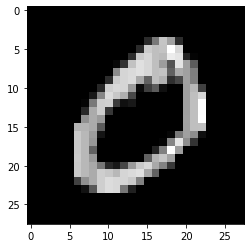

In [222]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap='gray')
plt.show()

In [223]:
model.save('num_reader')

INFO:tensorflow:Assets written to: num_reader\assets


In [224]:
new_model = tf.keras.models.load_model('num_reader/')

In [225]:
predictions = new_model.predict(x_test)
x_test.shape

(10000, 28, 28)

7


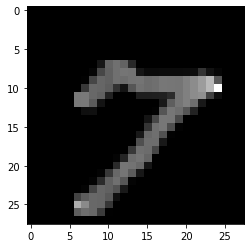

In [226]:
import numpy as np

print(np.argmax(predictions[9000]))

plt.imshow(x_test[9000], cmap='gray')
plt.show()


8


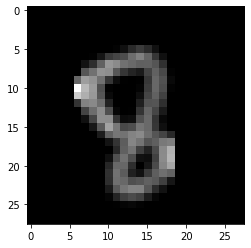

In [228]:
import cv2

IMG_SIZE = 28

img = cv2.imread("./test.png", cv2.IMREAD_GRAYSCALE)
blur = cv2.blur(img, (20, 20))
resized_img = cv2.resize(blur, (IMG_SIZE,IMG_SIZE))


y = []
y.append(resized_img)
y = tf.keras.utils.normalize(y, axis=1)
y = np.array(y).reshape(-1, IMG_SIZE, IMG_SIZE)

number_predict = new_model.predict(y)
print(np.argmax(number_predict[0]))

plt.imshow(y[0], cmap='gray')
plt.show()


